In [18]:
import numpy as np
import matplotlib.pylab as plt
import utils
import matplotlib as mpl
import pandas as pd
import dask.dataframe as dd
from satellites_forMC import *
from plots import *
from multiprocessing import Pool
mpl.rcParams['xtick.minor.visible']=True
mpl.rcParams['font.size']=45
mpl.rcParams['figure.figsize']=(16,16)
#mpl.rcParams['xtick.minor.visible']=True
mpl.rcParams['axes.linewidth']= 3.
mpl.rcParams['axes.titlepad'] = 20
#plt.rcParams['axes.linewidth']=5
plt.rcParams['xtick.major.size'] =15
plt.rcParams['ytick.major.size'] =15
plt.rcParams['xtick.minor.size'] =10
plt.rcParams['ytick.minor.size'] =10
plt.rcParams['xtick.major.width'] =5
plt.rcParams['ytick.major.width'] =5
plt.rcParams['xtick.minor.width'] =5
plt.rcParams['ytick.minor.width'] =5 
mpl.rcParams['axes.titlepad'] = 20 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
%autoreload

In [72]:
Vol = (250/0.7)**3

make = make_satellites(use_acc=True)

In [73]:
R1,P1,s1=np.loadtxt('/home/lz1f17/data//Rmaj/sat/11.6/Re_all11.6satJKcleaned_ETGs.txt', unpack=True)

binwidth = R1[1]-R1[0]

binsR = np.append(R1-binwidth/2, R1[-1]+binwidth/2)

binwidth=0.05
binsR = np.arange(0,2,binwidth)
BB = binsR[1:]-0.5*binwidth

In [74]:
datapoints = len(P1[P1!=0])
def chi2nu(ydata,ymod,sigma, model_dof):
    mask = np.where(ydata==0)
    ydata=ydata[mask]
    ymod=ymod[mask]
    sigma=sigma[mask]
    chisq=np.sum( ((ydata-ymod)/sigma)**2 ) 
    return chisq/(datapoints-model_dof)

# plots with varying parameters: mu, stripping, evolving AK, MCMC parameters

In [75]:
dict_SMHM = dict(gamma10=0.57, gamma11= 0, beta10=None, beta11=0,\
                M10=11.95, SHMnorm10=None, M11=0, SHMnorm11=0) 

/home/lz1f17/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/lz1f17/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/lz1f17/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

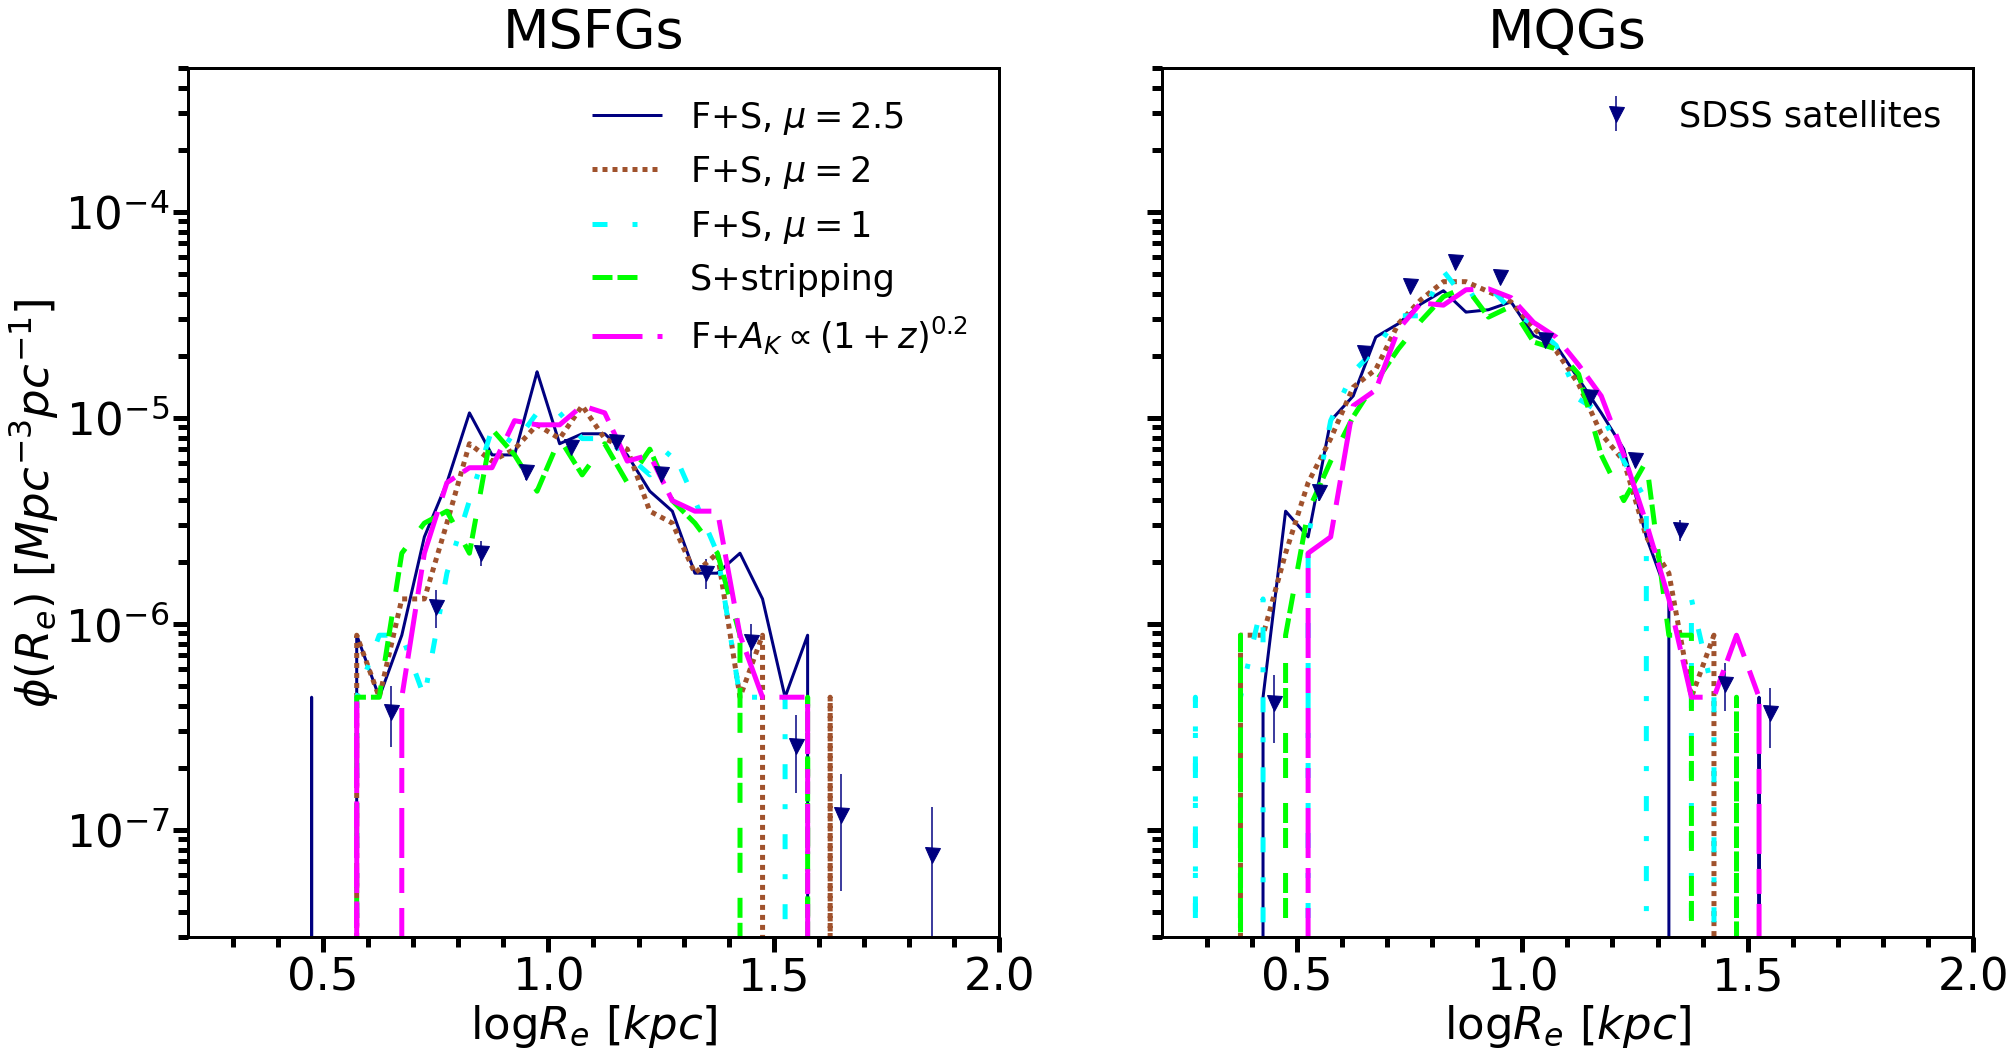

In [77]:
dict_mu25 = dict(scatterevol=False,Mstar_low=11.2, Mstar_up=12, mu=2.5, AK=0.013,sigmaK=0.1, AK_SF=0.024, sigmaK_SF=0.135, M0=1.5,stripping=False)

dict_mu2 = dict(scatterevol=False,Mstar_low=11.2, Mstar_up=12, mu=2, AK=0.013,sigmaK=0.1, AK_SF=0.024, sigmaK_SF=0.135, M0=1.5,stripping=False)
dict_mu1 =  dict(scatterevol=False,Mstar_low=11.2, Mstar_up=12, mu=1, AK=0.013,sigmaK=0.1, AK_SF=0.024, sigmaK_SF=0.135, M0=1.5,stripping=False)
dict_stripping = dict(scatterevol=False,Mstar_low=11.2, Mstar_up=12, mu=2.5, AK=0.013,sigmaK=0.1, AK_SF=0.024, sigmaK_SF=0.135, M0=1.5,stripping=True)
dict_evolveAk = dict(scatterevol=False,Mstar_low=11.2, Mstar_up=12, mu=2.5, AK=0.013,sigmaK=0.1, AK_SF=0.024, sigmaK_SF=0.135, M0=1.5,stripping=False, evolve_AK=True)
#ToDo: dict_MCMC
colors = ['navy','sienna','cyan','lime','magenta','gray']
dashes = [[1,0,1,0],[1,1,1,1],[3,5,1,5],[4,1,4,5],[10,3,5,2],[3,5,3,5]]
labels = [r'F+S, $\mu=2.5$',r'F+S, $\mu=2$', r'F+S, $\mu=1$','S+stripping',r'F+$A_K\propto(1+z)^{0.2}$', 'F+MCMC']
dictionaries = [dict_mu25,dict_mu2,dict_mu1,dict_stripping,dict_evolveAk]

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(32,16), sharey=True)
for D, (col,dash,lab) in zip(dictionaries, zip(colors, dashes, labels)) :

    df_high = make.make_censat(dict_SMHM=dict_SMHM, **D)
    df = df_high.query('upid!=-1')

    if D is not dict_mu25:
        lw=5
    else:
        lw=3
    hsat = np.histogram(df.query("TType=='LTGs'")['Re_sat'], bins=binsR)[0]/Vol/binwidth
    ax1.plot(BB,hsat, color=col,dashes=dash, label=lab, lw=lw)
    
    hsat = np.histogram(df.query("TType=='ETGs'")['Re_sat'], bins=binsR)[0]/Vol/binwidth
    ax2.plot(BB,hsat, color=col,dashes=dash, lw=lw)
    
R1,P1,s1=np.loadtxt('/home/lz1f17/data//Rmaj/sat/11.6/Re_all11.6satJKcleaned_LTGs.txt', unpack=True)
ax1.errorbar(R1,P1,yerr=s1, markersize=15,color='navy', fmt='v')
R1,P1,s1=np.loadtxt('/home/lz1f17/data//Rmaj/sat/11.6/Re_all11.6satJKcleaned_ETGs.txt', unpack=True)
ax2.errorbar(R1,P1,yerr=s1, markersize=15,color='navy', label='SDSS satellites', fmt='v')

ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_ylim(3.e-8,5.e-4)
ax2.set_ylim(3.e-8,5.e-4)        
ax1.set_xlim(0.2,2.)
ax2.set_xlim(0.2,2.)    

ax1.set_ylabel('$\phi(R_e) \ [Mpc^{-3} pc^{-1}]$')
ax1.set_xlabel('$\log{R_e} \ [kpc]$')
ax2.set_xlabel('$\log{R_e} \ [kpc]$')
ax1.set_title('MSFGs')
ax2.set_title('MQGs')
ax1.legend(frameon=False,fontsize=35)
ax2.legend(frameon=False,fontsize=35)

fig.savefig('Pictures/allmodels_acc.pdf', bbox_inches='tight')

/home/lz1f17/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/lz1f17/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/lz1f17/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

[2.586219999999999e-06]


/home/lz1f17/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/lz1f17/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


[2.586219999999999e-06, 3.4430339999999996e-06]


/home/lz1f17/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/lz1f17/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


[2.586219999999999e-06, 3.4430339999999996e-06, 4.223359e-06]


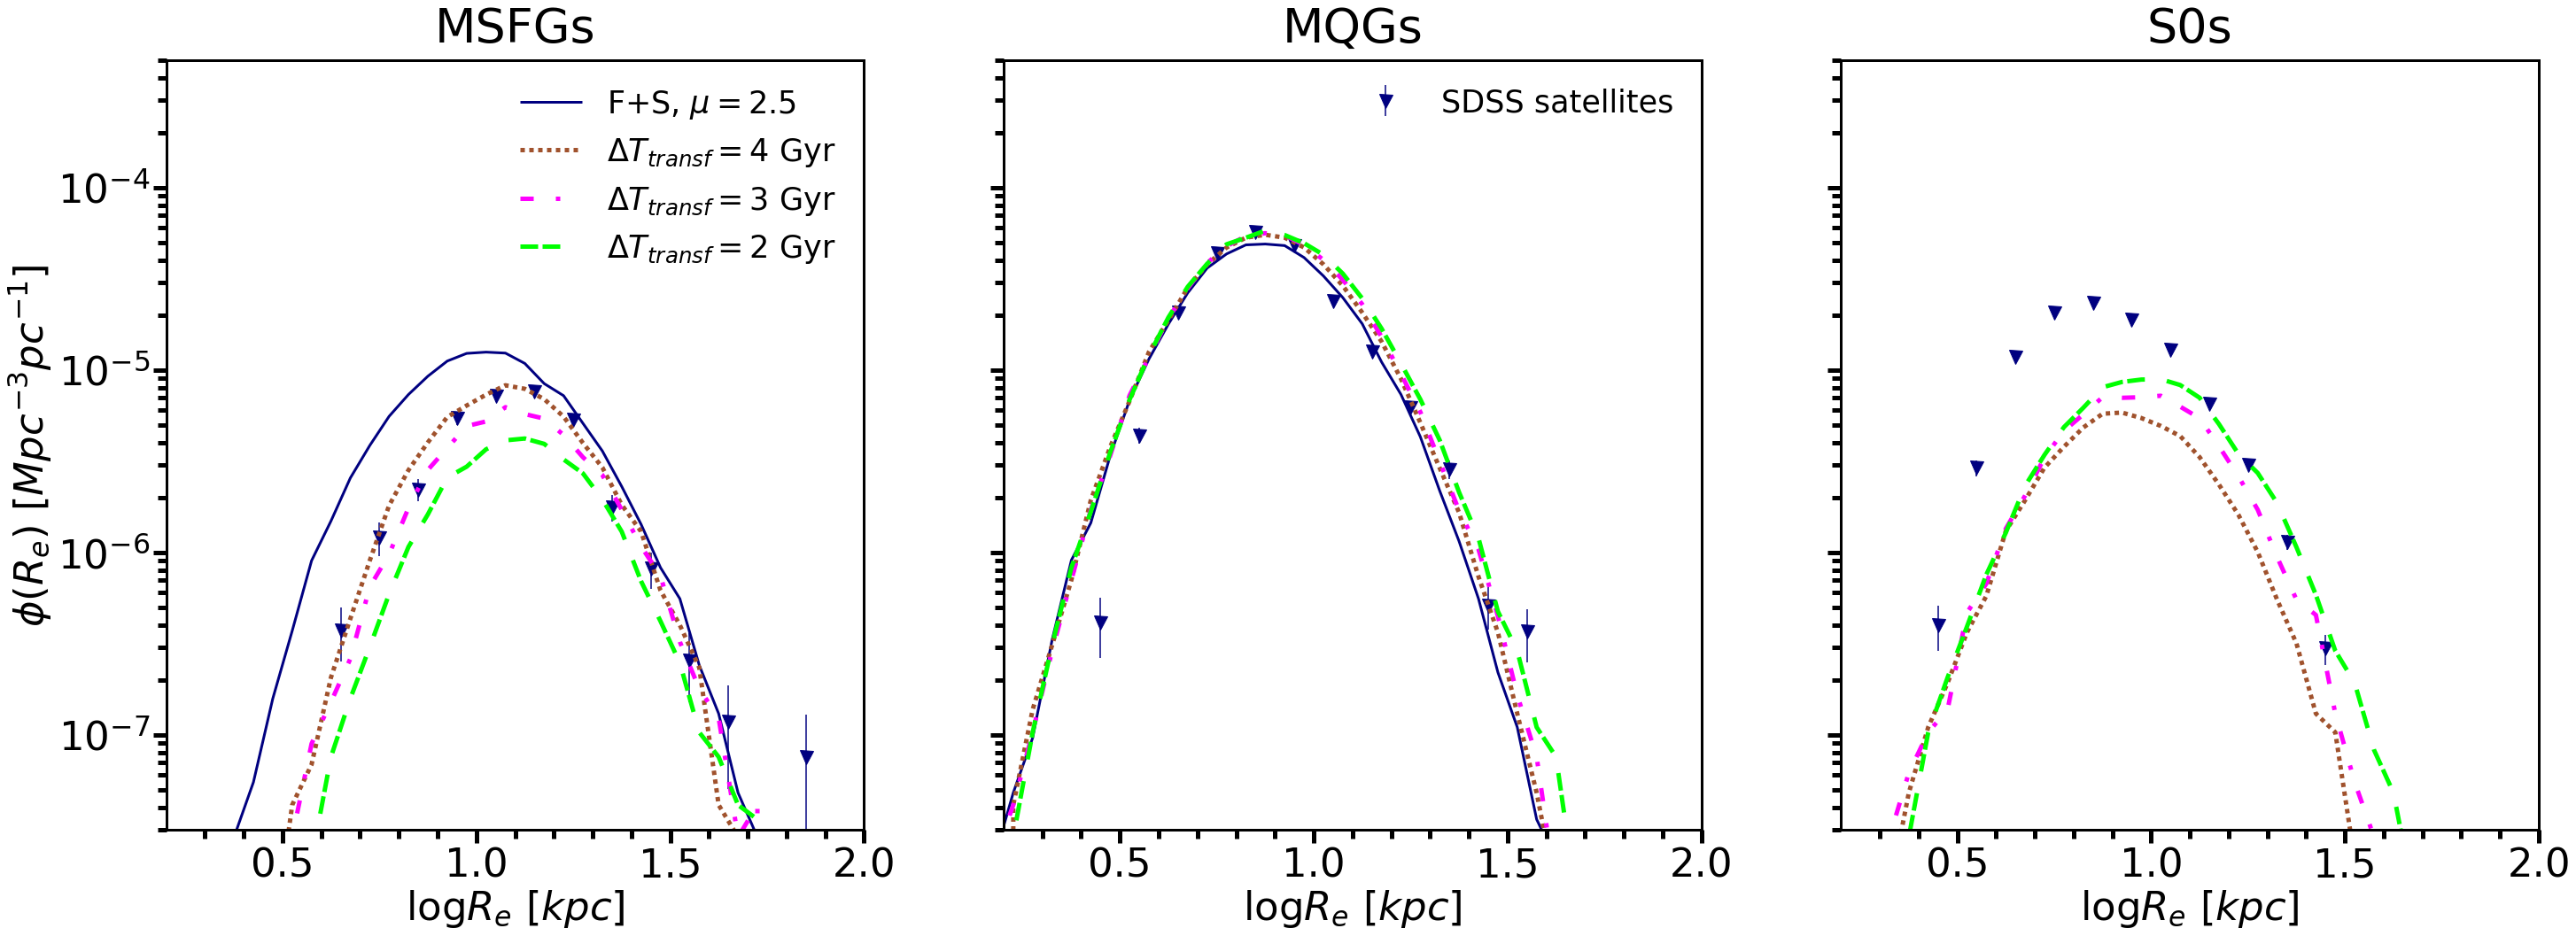

In [67]:
colors = ['navy','sienna','magenta','lime','cyan','gray']
dashes = [[1,0,1,0],[1,1,1,1],[3,5,1,5],[4,1,4,5],[1,3,3,2],[3,5,3,5]]
dict_transform4 = dict(scatterevol=False,Mstar_low=11.2, Mstar_up=12, mu=2.5, AK=0.013,sigmaK=0.1, AK_SF=0.024, sigmaK_SF=0.135, M0=1.5,stripping=False, deltaT_transf=4)
dict_transform3 = dict(scatterevol=False,Mstar_low=11.2, Mstar_up=12, mu=2.5, AK=0.013,sigmaK=0.1, AK_SF=0.024, sigmaK_SF=0.135, M0=1.5,stripping=False, deltaT_transf=3)
dict_transform2 = dict(scatterevol=False,Mstar_low=11.2, Mstar_up=12, mu=2.5, AK=0.013,sigmaK=0.1, AK_SF=0.024, sigmaK_SF=0.135, M0=1.5,stripping=False, deltaT_transf=2)

labels = [r'F+S, $\mu=2.5$',r'$\Delta T_{transf}=4$ Gyr',r'$\Delta T_{transf}=3$ Gyr',r'$\Delta T_{transf}=2$ Gyr']

dictionaries = [dict_mu25,dict_transform4,dict_transform3,dict_transform2]

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(48,16), sharey=True)
sums = []
for D, (col,dash,lab) in zip(dictionaries, zip(colors, dashes, labels)) :

    df_high = make.make_censat(dict_SMHM=dict_SMHM, **D)
    df = df_high.query('upid!=-1')

    if D is not dict_mu25:
        lw=5
    else:
        lw =3
    hsat = np.histogram(df.query("TType=='LTGs'")['Re_sat'], bins=binsR)[0]/Vol/binwidth
    ax1.plot(BB,hsat, color=col,dashes=dash, label=lab, lw=lw)
    
    hsat = np.histogram(df.query("TType=='ETGs'")['Re_sat'], bins=binsR)[0]/Vol/binwidth
    ax2.plot(BB,hsat, color=col,dashes=dash, lw=lw)

    if D is not dict_mu25:
        hsat = np.histogram(df.query("S0==1")['Re_sat'], bins=binsR)[0]/Vol/binwidth
        ax3.plot(BB,hsat, color=col,dashes=dash, lw=lw)
        sums.append(np.sum(hsat*binwidth))

    
        print(sums)
R1,P1,s1=np.loadtxt('/home/lz1f17/data//Rmaj/sat/11.6/Re_all11.6satJKcleaned_LTGs.txt', unpack=True)
ax1.errorbar(R1,P1,yerr=s1, markersize=15,color='navy', fmt='v',zorder=1)
R1,P1,s1=np.loadtxt('/home/lz1f17/data//Rmaj/sat/11.6/Re_all11.6satJKcleaned_ETGs.txt', unpack=True)
ax2.errorbar(R1,P1,yerr=s1, markersize=15,color='navy', label='SDSS satellites', fmt='v',zorder=1)
R1,P1,s1=np.loadtxt('/home/lz1f17/data//Rmaj/sat/11.6/Re_all11.6satJKcleaned_S0s.txt', unpack=True)
ax3.errorbar(R1,P1,yerr=s1, markersize=15,color='navy', fmt='v',zorder=1)

ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_ylim(3.e-8,5.e-4)
ax2.set_ylim(3.e-8,5.e-4)        
ax3.set_ylim(3.e-8,5.e-4)        
ax1.set_xlim(0.2,2.)
ax2.set_xlim(0.2,2.)    
ax3.set_xlim(0.2,2.)    


ax1.set_ylabel('$\phi(R_e) \ [Mpc^{-3} pc^{-1}]$')
ax1.set_xlabel('$\log{R_e} \ [kpc]$')
ax2.set_xlabel('$\log{R_e} \ [kpc]$')
ax3.set_xlabel('$\log{R_e} \ [kpc]$')

ax1.set_title('MSFGs')
ax2.set_title('MQGs')
ax3.set_title('S0s')
ax1.legend(frameon=False,fontsize=35)
ax2.legend(frameon=False,fontsize=35)

fig.savefig('Pictures/morphotransf.pdf', bbox_inches='tight')